In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
def plot_cdf(clust_file, label=None, color="tab:red", alpha=0.6, num_bold=None):
    # read clustering results from file and sort by clust weight
    df = pd.read_csv(clust_file)[1:] # ignore clust 0 (collection of unclustered structure)
    df.sort_values("norm_wt", ascending=False, inplace=True)
    # create cumulative distribution function from ordered weights
    cdf = df['norm_wt'].cumsum()
    
    # plot cdf
    plt.plot(
        range(1, len(cdf) + 1),
        cdf.values,
        linestyle='none',
        marker='o',
        color=color,
        alpha=alpha,
        label=label,
    )
    
    # highlight first num_bold points
    if num_bold is not None:
        # plot g30 300K cdf
        plt.plot(
            range(1, num_bold + 1), 
            cdf.values[:num_bold],
            linestyle='none', 
            marker='o',
            color=color,
            alpha=1,
        )
    return cdf

# Figure 3

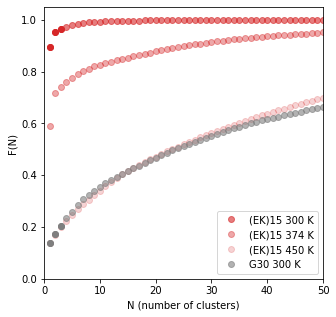

In [41]:
plt.figure(figsize=(5, 5))

# plot cumulative distribution functions
ek_300 = plot_cdf("clustering/EK_0.5.txt", label="(EK)15 300 K", num_bold=3)
ek_374 = plot_cdf("clustering/EK_0.5_374.txt", label="(EK)15 374 K", alpha=0.4)
ek_450 = plot_cdf("clustering/EK_0.5_450.txt", label="(EK)15 450 K", alpha=0.2)
gg_300 = plot_cdf("clustering/GG_0.5.txt", color="tab:gray", label="G30 300 K", num_bold=3)

# set plot properties
plt.xlim([0, 50])
plt.ylim([0, 1.05])
plt.xlabel('N (number of clusters)')
plt.ylabel('F(N)')
plt.legend()
plt.savefig('ek-gg-cluster-cdf.png', dpi=300, bbox_inches='tight')

In [42]:
ek_300[:3]

1     0.895596
3     0.954665
19    0.964513
Name: norm_wt, dtype: float64

In [43]:
gg_300[:3]

3     0.136586
10    0.173377
6     0.205744
Name: norm_wt, dtype: float64

### show effect of gromos clustering cutoff on CDF for (EK)15 at 300 K

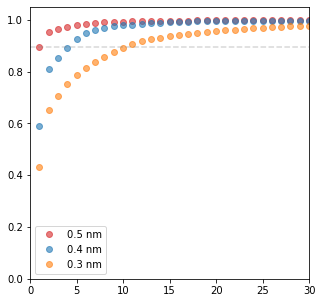

In [44]:
plt.figure(figsize=(5, 5))

ek_5 = plot_cdf("clustering/EK_0.5.txt", label="0.5 nm")
ek_4 = plot_cdf("clustering/EK_0.4.txt", label="0.4 nm", color="tab:blue")
ek_3 = plot_cdf("clustering/EK_0.3.txt", label="0.3 nm", color="tab:orange")

# line at probability for first EK300 cluster
plt.plot(
    [0, 100], 
    [ek_5.values[0], ek_5.values[0]], 
    ls='--', 
    color='tab:gray',
    alpha=0.3,
)

plt.xlim([0, 30])
plt.ylim([0, 1.05])
plt.legend()
plt.savefig('ek-vary-cutoff-cluster.png', dpi=300, bbox_inches='tight')

In [38]:
# include pic of clust 1 struct vs. clust 2 struct for 0.5 and 0.3